## **Code-2-ML**

Installing Scikit learn Latest Version.

Importing the required packages

In [78]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

Importing the Train and test Dataset given using the drive link.

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
#df=pd.read_excel("Train_dataset_.xlsx")
df = pd.read_excel("/content/drive/My Drive/Train_dataset_.xlsx")

In [81]:
#test=pd.read_excel("Test_dataset.xlsx")
test = pd.read_excel("/content/drive/My Drive/Test_dataset.xlsx")

## **Data Pre-processing**

Data preprocessing is must before doing any model training. But before that we have to get the Number of Unique values in every Integer coloumn.

In [82]:
for col in df.columns:
    print("col :{}\nno of unique are:{}\n".format(col,len(df[col].unique())))

col :Stock Index
no of unique are:7383

col :Index
no of unique are:5

col :Industry
no of unique are:5

col :VWAP
no of unique are:7068

col :General Index
no of unique are:6

col :NAV
no of unique are:5001

col :P/E Ratio
no of unique are:5951

col :Volumes Traded
no of unique are:7114

col :Inventory Turnover
no of unique are:579

col :Covid Impact (Beta)
no of unique are:6

col :Tracking Error
no of unique are:465

col :Dollar Exchange Rate
no of unique are:4

col :Put-Call Ratio
no of unique are:71

col :P/B Ratio
no of unique are:913

col :Stock Price
no of unique are:7383



Getting Number of null values in every specific column and you can see leaving the first three columns every other column has many null values. So, we have to replace this with suitable values to avoid discrepencies using the training the model.

In [83]:
df.isna().sum()

Stock Index               0
Index                     0
Industry                  0
VWAP                     38
General Index            62
NAV                      61
P/E Ratio               234
Volumes Traded          268
Inventory Turnover      399
Covid Impact (Beta)     376
Tracking Error           71
Dollar Exchange Rate     77
Put-Call Ratio           85
P/B Ratio                25
Stock Price               0
dtype: int64

Now, we are using Knn-Imputer to replace the null values with suitable values. This Knn-Imputer will check the values of above and below cells and process knn classification to get the best values.

In [84]:
from sklearn.impute import KNNImputer
k_im = KNNImputer(n_neighbors=9)
df.iloc[:,[3,4,5,6,7,8,9,10,11,12,13]]=k_im.fit_transform(df.iloc[:,[3,4,5,6,7,8,9,10,11,12,13]])


In [85]:
df.isna().sum()

Stock Index             0
Index                   0
Industry                0
VWAP                    0
General Index           0
NAV                     0
P/E Ratio               0
Volumes Traded          0
Inventory Turnover      0
Covid Impact (Beta)     0
Tracking Error          0
Dollar Exchange Rate    0
Put-Call Ratio          0
P/B Ratio               0
Stock Price             0
dtype: int64

In [86]:
df.head(15)

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,NYSE,Real Estate,700.290000,12765.84,32.38,45.350000,1.208599e+06,5.050000,-0.43,0.0520,1.000000,0.610000,9.20,156.987852
1,AA2,NYSE,Information Tech,214.520000,12765.84,33.25,170.560000,1.375336e+07,3.100000,0.23,0.0164,1.000000,1.061111,6.91,560.859622
2,AA3,NYSE,Information Tech,943.420000,12765.84,88.27,143.580000,6.892003e+06,7.700000,0.23,0.0396,1.000000,1.044444,6.09,1279.732874
3,AA4,BSE,Materials,828.130000,38182.08,73.66,151.760000,8.316793e+06,4.800000,0.03,0.0431,74.900000,1.110000,5.60,1121.787632
4,AA5,S&P 500,Real Estate,532.311111,3351.28,23.79,92.972222,3.943312e+06,8.060000,-0.43,0.0244,1.000000,1.070000,9.46,382.962534
5,AA6,BSE,Materials,259.610000,38182.08,10.63,153.050000,1.926387e+07,8.040000,0.03,0.0344,74.900000,1.150000,5.51,158.687016
6,AA7,NYSE,Healthcare,635.370000,12765.84,67.21,29.630000,7.086103e+06,5.870000,0.78,0.0186,1.000000,0.750000,8.60,209.645870
7,AA8,NSE,Real Estate,187.430000,11270.15,47.86,89.690000,6.948419e+06,6.550000,-0.43,0.0370,74.900000,0.780000,6.73,861.481269
8,AA9,NSE,Materials,950.810000,11270.15,31.50,159.580000,1.361019e+06,2.720000,0.03,0.0534,74.900000,1.220000,6.46,514.240811
9,AA10,JSE,Healthcare,961.020000,55722.00,72.16,29.610000,1.438540e+07,7.870000,0.78,0.0292,31.200000,1.210000,4.42,239.085804


Now, we are going using the Label Encoder for Encoding string values to integer values. So, that we can use them also in model training.

In [87]:
lb = preprocessing.LabelEncoder()
df['Index'] = lb.fit_transform(df['Index'])
df['Industry'] = lb.fit_transform(df['Industry'])
df.head()

,Stock Index,Index,Industry,VWAP,General Index,NAV,P/E Ratio,Volumes Traded,Inventory Turnover,Covid Impact (Beta),Tracking Error,Dollar Exchange Rate,Put-Call Ratio,P/B Ratio,Stock Price
0,AA1,3,4,700.290000,12765.84,32.38,45.350000,1208599.0,5.05,-0.43,0.0520,1.0,0.610000,9.20,156.987852
1,AA2,3,2,214.520000,12765.84,33.25,170.560000,13753356.0,3.10,0.23,0.0164,1.0,1.061111,6.91,560.859622
2,AA3,3,2,943.420000,12765.84,88.27,143.580000,6892003.0,7.70,0.23,0.0396,1.0,1.044444,6.09,1279.732874
3,AA4,0,3,828.130000,38182.08,73.66,151.760000,8316793.0,4.80,0.03,0.0431,74.9,1.110000,5.60,1121.787632
4,AA5,4,4,532.311111,3351.28,23.79,92.972222,3943312.0,8.06,-0.43,0.0244,1.0,1.070000,9.46,382.962534


The below cell shows the co-relation between every column to every other column and if value is towards 1 than that both columns are more related. 

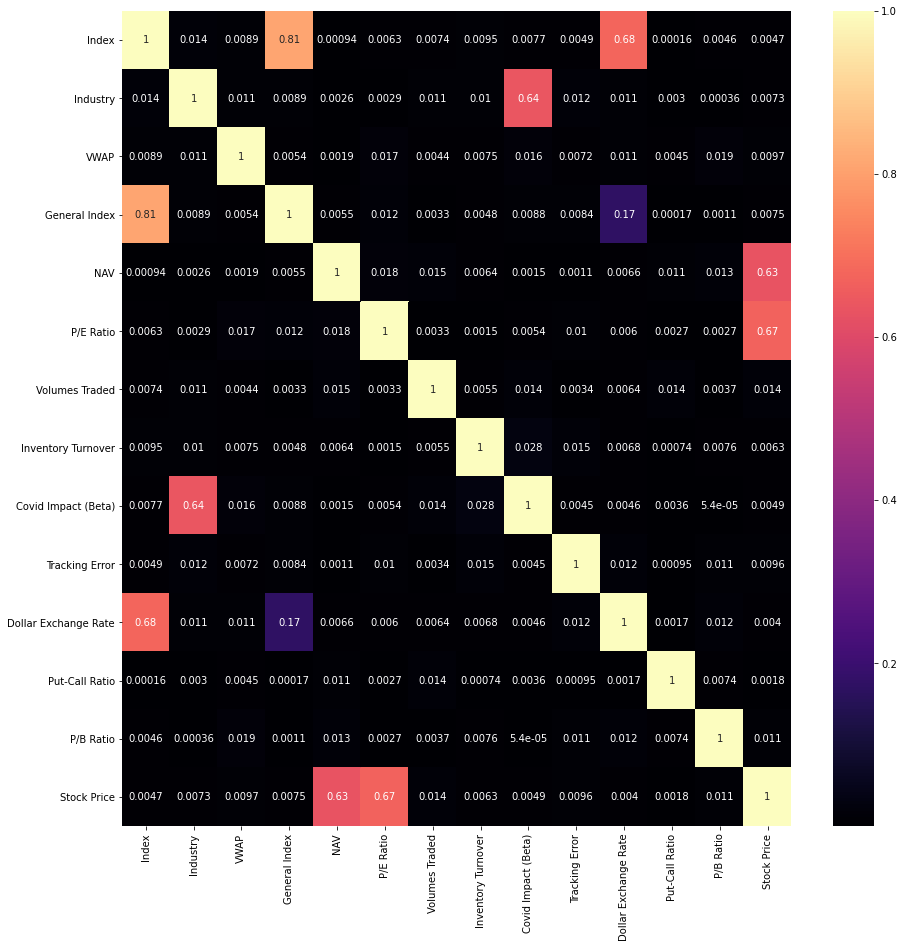

In [88]:
corr_matrix = df.corr().abs()
plt.figure(figsize = (15,15))

sns.heatmap(data=corr_matrix,annot = True, cmap = "magma")

## **Modeling Analysis for Predicting Stock prices**

Now, its time for training. Here, we are splitting the data into dependent data(Y) and Independent data (X). Using the dependent data we are going to train the respective model and use it to predict the future values.
  
  From Independent data we are removing the stock price and Stcok index because, stock price is what we need to predict and stock index is entirely a unique column.

In [89]:
X=df.drop(["Stock Price","Stock Index"],axis=1)
y=df["Stock Price"]


The next cell has the code for importing the module and splitting the data. Here, we need a split because to check the accuracy.

Here the test variables are actually the validation variables. But for convenience they are named as test

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Its time for selecting the algorithm. We are selecting the Regression model because classification algorithms are not suitable as we are not classifying the data into any specific classes, we are predicting the approx value of the stock price.

### **Multi Linear Regression**

Next we are calling the calling the module Linear regression and fitting the data and calculating the intercept and co-efficients. Later, in the last line of the code is the predicting of the test values.

Note : These methods are same for coming more algorithms.

In [91]:
from sklearn.metrics import r2_score 
lr=LinearRegression()
lr.fit(X_train,y_train)
print('Intercept: \n', lr.intercept_)
print('Coefficients: \n', lr.coef_)
lr_pred = lr.predict(X_test) 

Intercept: 
 -535.1764796522704
Coefficients: 
 [-6.17235991e+00 -1.33492459e+00  3.07733178e-02 -2.71289674e-04
  1.05978308e+01  5.30531200e+00 -2.50298980e-07 -4.11813416e-01
 -6.27478117e+00 -8.27413272e+00 -1.55501142e-01 -1.20985351e+01
 -8.26427556e-01]


## **Bayseian Ridge Regression**

In [92]:
from sklearn.linear_model import BayesianRidge 
br = BayesianRidge() 
br.fit(X_train, y_train) 
# Model making a prediction on test data 
br_pred = br.predict(X_test) 
print('Intercept: \n', br.intercept_)
print('Coefficients: \n', br.coef_)

Intercept: 
 -566.1937287254251
Coefficients: 
 [-1.61103015e+00 -4.50321060e-01  3.08790730e-02 -3.66165428e-05
  1.05934974e+01  5.30516879e+00 -2.58247759e-07 -3.80309807e-01
 -1.41866116e+00 -3.53744878e-03 -5.12544037e-02 -1.59548978e+00
 -8.13479811e-01]


## **Decision Tree Regressor**

In [93]:
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor(random_state=1)
dr.fit(X_train, y_train)
dr_pred = dr.predict(X_test) 

## **Random Forest Regressor**

In [94]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test) 

### **Comparing the above models**

Calculating the Root means Square Error for above used algorithms.

In [95]:
from math import sqrt
print("RMSE of  Linear Regression - " , sqrt(mean_squared_error(y_test, lr_pred)))
print("RMSE of  BayesianRidge Regression - " , sqrt(mean_squared_error(y_test, br_pred)))
print("RMSE of Decision Tree Regressor - " , sqrt(mean_squared_error(y_test, dr_pred)))
print("RMSE of  RandomForestRegressor - " , sqrt(mean_squared_error(y_test, rf_pred)))

RMSE of  Linear Regression -  153.99779918062774
RMSE of  BayesianRidge Regression -  153.85160699884054
RMSE of Decision Tree Regressor -  101.28581785683117
RMSE of  RandomForestRegressor -  72.58350136113881


Calculating the R-Squared for the above models.

In [96]:
print("R-square of Linear Regression - " , r2_score(y_test, lr_pred))
print("R-square of BayesianRidge  Regression - " , r2_score(y_test, br_pred))
print("R-square of Decision Tree Regressor - " , r2_score(y_test, dr_pred))
print("R-square of RandomForestRegressor - " , r2_score(y_test, rf_pred))

R-square of Linear Regression -  0.861457473141787
R-square of BayesianRidge  Regression -  0.8617203888556582
R-square of Decision Tree Regressor -  0.9400690234517998
R-square of RandomForestRegressor -  0.9692227434618984


**Since the RMS  value is very less for Random Forest Regressor when compared to other models, and R2 is also high, we choose it as our model.**

### **Visualising the Random Forest Regressor with predicted and True Values.**

Text(0, 0.5, 'Predicted Values')

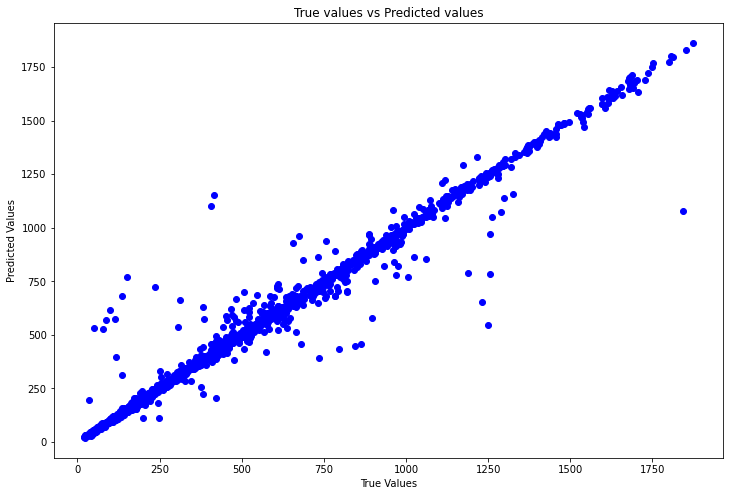

In [97]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,rf_pred,color='blue')
titlestr = 'True values vs Predicted values'
plt.title(titlestr)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

## **Actual Prediction for Question 1**

Before using the data for prediction we have to clean it. As in the case of above we are agian using the same Knn-imputer for replacing the null values. Then, we are using the Label Encoder and Later, we are removing the Stock Index column.

In [98]:
from sklearn.impute import KNNImputer
k_im = KNNImputer(n_neighbors=9)
test.iloc[:,[3,4,5,6,7,8,9,10,11,12,13]]=k_im.fit_transform(test.iloc[:,[3,4,5,6,7,8,9,10,11,12,13]])
lb = preprocessing.LabelEncoder()
test['Index'] = lb.fit_transform(test['Index'])
test['Industry'] = lb.fit_transform(test['Industry'])
a=test.drop(["Stock Index"],axis=1)

Its time for actual prediction.

In [99]:
test_pred = dr.predict(a)
test_pred

array([ 793.64838685,  279.63437257, 1550.6530114 , ...,  972.68731582,
        353.16849725, 1313.89262061])

Combining the Stock Index to form actual Data frame.

In [100]:
output1=pd.DataFrame()
output1['Stock Index']=test['Stock Index']
output1['Stock Price']=test_pred
output1

,Stock Index,Stock Price
0,AC3235,793.648387
1,AC3236,279.634373
2,AC3237,1550.653011
3,AC3238,815.691985
4,AC3239,268.817191
...,...,...
3326,AD2734,149.701053
3327,AD2735,562.484945
3328,AD2736,972.687316
3329,AD2737,353.168497


Exporting to a csv file to drive.

In [101]:
#exporting to excel to drive
output1.to_csv("/content/drive/My Drive/output_01.csv")

In [107]:
import os
os.system('pip3 freeze > requirements.txt')

0